# Prison Break

## Get the Data

In [1]:
import pandas as pd
from helper import *
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
# Create a list of lists of prison break attemps
data = [['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired the 1975 action movie Breakout, which starred Charles Bronson and Robert Duvall.[9]"],['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon", 'On October 31, 1973, an IRA member hijacked a helicopter and forced the pilot to land in the exercise yard of Dublin\'s Mountjoy Jail\'s D Wing at 3:40\xa0p.m., October 31, 1973. Three members of the IRA were able to escape: JB O\'Hagan, Seamus Twomey and Kevin Mallon. Another prisoner who also was in the prison was quoted as saying, "One shamefaced screw apologised to the governor and said he thought it was the new Minister for Defence (Paddy Donegan) arriving. I told him it was our Minister of Defence leaving." The Mountjoy helicopter escape became Republican lore and was immortalized by "The Helicopter Song", which contains the lines "It\'s up like a bird and over the city. There\'s three men a\'missing I heard the warder say".[1]'],['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson', "43-year-old Barbara Ann Oswald hijacked a Saint Louis-based charter helicopter and forced the pilot to land in the yard at USP Marion. While landing the aircraft, the pilot, Allen Barklage, who was a Vietnam War veteran, struggled with Oswald and managed to wrestle the gun away from her. Barklage then shot and killed Oswald, thwarting the escape.[10] A few months later Oswald's daughter hijacked TWA Flight 541 in an effort to free Trapnell."],['February 27, 1981', 'Fleury-Mérogis, Essonne, Ile de France', 'France', 'Yes', 'Gérard DupréDaniel Beaumont', "With the help of Serge Coutel, Gérard Dupré and Daniel Beaumont, succeed in the first and double helicopter escape of a French prison, in Fleury-Mérogis (Essonne), the best kept prison of France. The men hijacked a helicopter and its pilot that they rented to fly from Paris to Orléans. The pilot, Claude Fourcade, was taken hostage and was told that they were holding his wife and daughter hostage (which was not true) ... The flight turned into Paris - Fleury -Merogis - Porte d'Orléans.[11]"],['May 7, 1981', 'Orsainville Prison, Quebec City', 'Canada', 'No', 'Marina Paquet (hijacker)Giles Arseneault (prisoner)', 'Marina Paquet held a sawed off shotgun against the back of the head of a helicopter pilot. She demanded that he land in the Orsainville prison courtyard, where her boyfriend (awaiting extradition to California on a murder charge) was set to escape. The pilot, Brian Jenner, feigned a panic attack, put the helicopter through some rough maneuvers and was then able to convince Paquet, in the back seat of the Jet Ranger, to turn over her shotgun and her knife. Jenner then gave her the choice of any landing spot, except the prison. She chose to go back to the airport. The pilot then explained, in great detail, exactly where they were and where they would be landing on arrival at the Quebec City airport. He added that the police would surely be aware by then, that she had hijacked the helicopter but would not yet be aware that she had given up her arms to the pilot. All the time Jenner was squeezing the transmit button on his cyclic stick and the tower was picking up all the details. The moment they touched down at the airport, the woman left the helicopter but the police, who had been advised of the situation by the control tower, were hiding nearby, and captured Paquet within seconds.'],['January, 1983', 'Pentridge (HM Prison)', 'Australia', 'No', 'David McMillan', "Arrests were made for the 1983 attempted helicopter escape from Melbourne's Pentridge Prison in Australia.[12] The three, all held on drug-importation charges, had hired a former SAS soldier, then living in the Philippines, to lift the prisoners from the jail's tennis court to a nearby van fitted with panels to hide them for the 600 kilometre road trip to Sydney, where a yacht was to take them to Manila. The plan was thwarted when Lord Tony Moynihan, himself an exile in the Philippines, informed the Australian Federal Police, who then ran it as a sting operation. Tony Moynihan would later become an informer against Howard Marks in a Florida trial. Of the accused, only David McMillan and his accountant friend who had visited the prison stood trial. During the hearings, few prosecution witnesses used their real names as they were mostly from Moynihan's former West African MI6 unit. Those on trial were convicted and sentenced.[13]"],['December 19, 1985', 'Perry Correctional Institution, Pelzer, South Carolina', 'United States', 'Yes', 'James Rodney LeonardWilliam Douglas BallewJesse Glenn Smith', 'One murderer, James Rodney Leonard, and two armed robbers, William Douglas Ballew and Jesse Glenn Smith, fled in a helicopter with a pilot and a woman hijacker with a pistol to a getaway car 4 to 5 miles away.[14] The 3-passenger helicopter was so overloaded with 5 occupants that it barely cleared the fence, while flying away in a hail of gunfire that injured one guard. Two other men attempted to escape as well, but either jumped or were pushed off when the pilot told the escapees that the helicopter could not take off.[15] The three escapees were captured on December 23 in Camden County, Georgia.[16]'],['December 31, 1985', 'Cândido Mendes penitentiary, Ilha Grande, Rio de Janeiro', 'Brazil', 'Yes', 'José Carlos dos Reis Encina, a.k.a. "Escadinha"', 'Drug lord Encina was rescued by José Carlos Gregório, aka "Gordo", who rented the Bell 47 aircraft under the guise of surveying some lands he intended to buy. "Gordo" forced the pilot to land and pick up Encina, who had escaped the prison proper earlier. Encina was recaptured three months later after being shot in a firefight.[17]'],['May 26, 1986', 'Prison de la Santé', 'France', 'Yes', 'Michel Vaujour', 'Vaujour had 28 years to serve for attempted murder and armed robbery; this was his fourth escape attempt. He made his way to the roof by threatening guards with a fake pistol and nectarines painted as grenades. On top of the jail he was picked up by his wife Nadine, who had taken helicopter pilot lessons especially for the escape.[5] They landed at a nearby football pitch and fled in a waiting car.[2] Paris-Match published amateur photos of the escape, which was made into a film starring Béatrice Dalle in 1991.[18]'],['November 5, 1986', 'Federal Correctional Institution, Dublin', 'United States', 'Yes', 'Samantha Lopez', 'Ronald J. McIntosh walked away from a minimum security prison on October 28 and then hijacked a helicopter on November 5.[19][20] He used the helicopter to free Samantha Lopez from the Federal Correctional Institution at Dublin, east of San Francisco. Both were later caught on November 15 when they arrived to pick up wedding rings from a California shopping mall. The authorities were monitoring the account McIntosh used to write the check and the police were waiting for them. Ron McIntosh for his role in the escape was sentenced to 25\xa0years in prison. Samantha Lopez was given five years added to her 50-year sentence for a 1981 bank robbery in Georgia.[21] As they were driven away to their separate prisons McIntosh was able to lean out of a car window and yell, "I love you!" to Lopez.[22] Samantha Lopez was released from prison on 20 April 2010.[23]'],['November 23, 1986', 'Prigione di Rebibbia, Roma', 'Italy', 'Yes', 'André BellaïcheGianluigi EspositoLuciano Cipollari', 'A red cross helicopter was hijacked by two gunmen and forced to fly to the maximum-security Rebibbia Prison courtyard. The pilot hovered the helicopter three feet off the courtyard ground while around 50 inmates were exercising. While the hijackers laid covering fire, three inmates tried to board the helicopter. One escapee, Andre Bellaiche, 36, was a Tunisian-born Frenchman who was in jail for murder and bank robbery. The other escapee, Gianluigi Esposito, 30, was an arms smuggler accused of providing weapons to Italian terrorists. The third man, Luciano Cipollari, 24, an Italian extradited from France in 1985 for murder, slipped and fell preventing him from escaping. The helicopter flew to a nearby soccer field scattering an ongoing game. The men ran out of the helicopter and hijacked a car to escape.[24] They later managed to flee Italy, but police was able to track them down and they were both arrested again on December 13, 1986. Esposito later revealed that he had intentionally prevented Cipollari from boarding, because he was just 2 years away from being released.[25]'],['December 10, 1987', 'Gartree (HM Prison)', 'United Kingdom', 'Yes', 'Sydney DraperJohn Kendall', "At 3:16\xa0p.m. on December 10, 1987, John Kendall and Sydney Draper were sprung from Gartree's exercise yard with the aid of a hijacked Bell 206L helicopter. Kendall was a gangland boss serving eight years while Draper was jailed for murder and serving a life sentence.[26] The escape caused great controversy at the time and led to a tightening of security at the jail. Kendall was recaptured 10 days later but Draper remained at large for 13 months."],['July 11, 1988', 'Penitentiary of New Mexico', 'United States', 'Yes', 'Mahoney Danny Francis MitchellRandy Lackey', 'Pilot Charles Bella was hired to fly a real estate agent around the Santa Fe area. As he was flying his Aerospatiale Gazelle helicopter she pulled a gun and forced him to land in the courtyard of the Penitentiary of New Mexico. Three inmates jumped in and he flew the aircraft to another site, pursued by a US Customs Service helicopter that was later joined by a state police helicopter. Pursuing helicopters claimed that Bella tried to force them down through aggressive maneuvers. However, they were able to tail him and police were waiting for the helicopter every time it touched down.[8][27] Two of the prisoners, Francis Mitchell and Randy Lackey, were captured almost right away while Danny Mahoney was later captured with assistance from a canine unit.[8]'],['April 17, 1989', 'Federal Holding Facility, Miami, FL', 'United States', 'No', 'Ben Kramer', 'Famous Apache Boat owner and racer Ben Kramer tried to escape by helicopter from the Metropolitan Correctional Center, a Federal Prison (holding) in Southwest Miami on April 17, 1989. The escape failed when the rookie pilot, Charles Clayton Stevens, hovered 12 inches off the ground in a very tight space (200\'long by 50\' wide). When the 6\'-2", 240\xa0lb Kramer jumped into the small two seater Bell 47D-1 (trainer), its rear rotor struck the razor wire, causing it to be uncontrollable. Stevens made an attempt to take off anyway. One of the skids caught on the razor wire, causing the helicopter to catapult over the fence and crash into the prison grounds. Both pilot and escapee sustained extensive injuries.[28][29] Ben Kramer was serving life without parole for Racketeer Influenced and Corrupt Organizations Act (RICO) charges resulting from drug trafficking, and also pleaded guilty to the murder of fellow boat builder and racer Don Aronow, owner of Cigarette Off Shore Boats.[28]'],['August 19, 1989', 'Arkansas Valley Correctional Facility', 'United States', 'Yes', 'Ralph BrownFreddie Gonzales', 'Colorado prison inmates Ralph Brown and Freddie Gonzales were able to escape via helicopter. Two women, Rebecca Brown and Patricia Gonzales chartered a helicopter out of Denver Colorado. Once airborne the women held semi-automatic pistols to pilot Tim Graves head and ordered him to land in the prison yard to pick up the two men. They were recaptured in Holdrege, Nebraska, that night after firing shots at law enforcement officers.[30]'],['June 19, 1990', 'Kent Penitentiary, British Columbia', 'Canada', 'Yes', 'Robert FordDavid Thomas', 'Two prisoners, Robert Ford and David Thomas, escaped when a hijacked helicopter landed in the courtyard. They were captured by the RCMP at Harrison Lake two days later. Correctional Officer R. KIRBY was shot during the incident and survived. The pilot, Fred Fandrich of Valley Helicopters, was not injured. The Bell 206 helicopter was damaged by gunfire from prison guards.'],['April 7, 1991', 'Rio Piedras State Penitentiary, Puerto Rico', 'Puerto Rico', 'Yes', 'William Lane', 'Inmates were able to escape when a helicopter plucked them from the prison. The escape prompted the Puerto Rico House Government Committee to pass a regulation that allowed penal officials to fire on any helicopter aiding an escape attempt.[31] Plans for the escape have been attributed to drug dealer Papo Cachete, who died during 2019.'],['February 24, 1992', 'Lyon Prison', 'France', 'Yes', '—', 'Two armed men hijacked a helicopter in Albertville as it was about to take off to pick up skiers in the Alps and forced the pilot to fly to the prison. The helicopter landed in the courtyard and three prisoners clambered aboard. After this successful escape, cables were strung across the central yard at five-metre intervals.[5]'],['December 1992', 'Touraine Central Prison, Tours', 'France', 'No', '—', 'The would-be escapee was shot dead by prison guards; three others were wounded.[18]'],['June 17, 1993', 'Touraine Central Prison, Tours', 'France', 'No', 'Michel Vaujour', "Vaujour and his wife were imprisoned in 1991. A man and woman hijacked a helicopter and held the pilot's family hostage. The wife alerted police and the prison was locked down before the helicopter arrived. It returned to its base, from where the hijackers escaped in a car.[18]"],['December 30, 1996', 'High Security Prison, Santiago', 'Chile', 'Yes', 'Four members of the Manuel Rodriguez Patriotic Front', 'Two women suspected of involvement were Irish citizens, raising suspicions of a Provisional IRA link to the left-wing rebel escapees.[32]'],['September 18, 1997', 'De Geerhorst jail', 'Netherlands', 'No', '—', 'A September 18, 1997 escape attempt ended in failure when the helicopter crashed into the prison ground of the Dutch prison, De Geerhorst. The helicopter had been stolen earlier in Belgium. The pilot was killed and the Colombian prison escapee, who was serving a long-term sentence for drug trafficking, walked away with slight injuries.[33]'],['March 25, 1999', 'Metropolitan Remand and Reception Centre', 'Australia', 'Yes', 'John Killick', "On March 25, 1999, librarian Lucy Dudko hired a helicopter under the pretence of checking out the upcoming Olympic site in Sydney.[34] Using a gun she forced pilot Tim Joyce to land on the Metropolitan Remand and Reception Centre grounds. Waiting was John Killick, who was serving 28 years for armed robberies. He jumped in the helicopter making an escape while being fired on by guards and cheered on by inmates. They landed in a park where Killick hijacked a taxi at gunpoint. The two were able to elude authorities for six weeks before being arrested at the Bass Hill Tourist Park. Lucy Dudko, dubbed Red Lucy by the media, was sentenced to the maximum of 10 years and was sent to Mulawa Correctional Centre women's prison. On May 9, 2006, she was released on parole after serving 7 years of her sentence.[35] John Killick was released on January 22, 2015, but is not allowed to have contact with Dudko until he turns 80 years old.[36]"],['June 5, 2000', 'Martin Treatment Center for Sexually Violent Predators, Martin County Florida', 'United States', 'Yes', 'Steven Whitsett', "Steven Whitsett was serving a civil commitment as a Sexually Violent Predator at the Martin Treatment Center. On June 5, 2000, at approximately 1 p.m., correctional officers patrolling the perimeter of the treatment center reported a helicopter approaching from south of the facility. Piloted by Clifford Burkhart, a former lover of Whitsett, the helicopter landed inside the fenced compound.[37] While Whitsett was climbing aboard, the helicopter struck an object. As a result of the damage the helicopter crashed about 100 yards south of the perimeter fence. Twenty-six hours from the time of the escape, a Martin County Sheriff's deputy spotted Whitsett and Burkhart from a search helicopter. The two men were in a canal, in shoulder-deep water, four miles east of the treatment facility. For the escape and weapons charges stemming from the escape Whitsett received a criminal sentence of 25 years. Whitsett was awaiting a retrial when his conviction was overturned in 2007. For his part in the escape, Burkhart was sentenced to 7 years, followed by 10 years of probation. Burkhart was released from prison in 2007.[38]"],['December 13, 2000', 'Lyon prison', 'France', 'Yes', '—', 'Three men were able to escape a prison near Lyon by having an accomplice fly a hijacked helicopter over the prison. A net was lowered and the three inmates were able to grab hold and lifted to freedom. Guards were able to fatally shoot one of the convicts. The remaining two were recaptured after a gun battle with police.[5]'],['January 19, 2001', 'Luynes prison', 'France', 'Yes', 'Pascal Payet', 'Pascal Payet escaped from Luynes prison using a hijacked helicopter.[6]'],['March 24, 2001', 'Draguignan prison', 'France', 'Yes', 'Abdelhamid CarnousEmile Forma-SariJean-Philippe Lecase', 'On March 24, 2001, an armed man hijacked a helicopter from a nearby airfield. The pilot was forced to land in the courtyard of the prison. Three convicts managed to get aboard before flying 60 kilometres (37\xa0mi) away. Landing in the village of Auribeau-sur-Siagne, the pilot was released and the men got into a waiting getaway car. The escapees were later identified as convicted armed robbers Emile Forma-Sari, Jean-Philippe Lecase and Abdelhamid Carnous.[39]'],['May 28, 2001', 'Fresnes prison', 'France', 'No', '—', '(Although not a helicopter escape in the truest sense, it is listed here because of the large role a helicopter played in the incident). In May 2001 a hijacked helicopter flew over Fresnes prison, south of Paris and dropped weapons in the exercise yard. Two prisoners armed with a bulletproof vest, an automatic pistol and a Kalashnikov dropped by the helicopter were able to take three guards hostage in an attempt to escape from prison. The hostage drama lasted about 24\xa0hours before the prisoners surrendered.[40]'],['January 17, 2002', 'Parada Neto Penitentiary', 'Brazil', 'Yes', '—', 'A helicopter was flown into Parada Neto Penitentiary, freeing two inmates serving time for murder and bank robbery. Earlier in the day two men rented a helicopter pretending to be tourists wanting a panoramic ride over the city. While in the air they drew guns and forced the pilot to land in the central yard of the prison. The inmates jumped aboard, and when the pilot took off again guards opened fire. The helicopter was found abandoned on a football pitch 50 kilometres (31\xa0mi) away full of bullet holes.[41]'],['December 30, 2002', 'Las Cucharas prison, Puerto Rico', 'United States', 'Yes', 'Orlando Cartagena Jose Rodriguez Victor Diaz Hector Diaz Jose Tapia', 'In Puerto Rico five prisoners escaped from Las Cucharas prison in Ponce. Two men had earlier rented the helicopter saying they wanted to inspect construction sites. They forced the pilot at gunpoint to land on the roof of the jail where they picked up the five convicts. To reach the roof the inmates cut a hole in the chain link fence. One was forced to hang onto the skids outside the helicopter as there was no room inside. The escapees were: Orlando Valdes Cartagena, who was serving a 254-year sentence for murder Jose A. Perez Rodriguez, who was serving a 319-year sentence for murder Victor Gonzalez Diaz, who was serving a 113-year sentence Hector Marrero Diaz, who was serving 109-year sentence Jose M. Rojas Tapia, who was serving a 100-year sentence. Of the five, only Victor Gonzalez Diaz was not recaptured immediately. The inmates claimed to have killed him soon after the break-out. He later surrendered himself to authorities in January 2003.[42]'],['April 4, 2003', 'Luynes prison', 'France', 'Yes', 'Eric AlboreoFranck PerlettoMichel Valero', 'Pascal Payet organized the helicopter escape of three men, Franck Perletto, Eric Alboreo, and Michel Valero from Luynes prison using a hijacked helicopter.[43] Payet himself escaped from the same Luynes prison in 2001.[6] He and the three men were later captured but in July 2007 again escaped by helicopter from Grasse prison in south-east France.'],['July 2005', 'France', 'France', 'No', '—', 'A helicopter escape attempt was foiled when alarms were set off as the helicopter tried to land on the roof.[5]'],['December 10, 2005', 'Aiton Prison', 'France', 'Yes', 'Hubert SellesJean-Claude MorettiMohamed Bessame', 'On December 10, 2005, two men rented a helicopter under the pretense of using it to do some back-country cross-country skiing. Brandishing guns, the men forced the pilot to land in the yard of the Aiton prison where three inmates boarded the helicopter. One inmate was serving time for a drugs-related conviction, one for armed robbery and the third for leading a robbery. The helicopter landed in open country near Grenoble where they left the pilot after relieving him of his phone and radio.[5]'],['June 6, 2006', 'Korydallos Prison', 'Greece', 'Yes', 'Vassilis Paleokostas', "On June 6, 2006, Nikos Paleokostas and another man hijacked a helicopter, forcing it to land on the roof of the Korydallos Prison. Two convicts scrambled on, Nikos's brother, Vassilis Paleokostas who was sentenced to a 25-year sentence for kidnapping and bank robbery and Alket Rizai, who was serving a life sentence for manslaughter. The helicopter flew to a nearby graveyard from where they fled on motorcycles.[7]"],['April 15, 2007', 'Lantin Prison, Liège', 'Belgium', 'Yes', 'Eric Ferdinand', 'Two men hijacked a small helicopter and forced Pilot Eric Mathieu to land in the courtyard to pick up inmate Eric Ferdinand. Earlier the hijackers paid for the flight at an airfield near the city of Sint-Truiden saying they were tourists from Marseilles but eventually pulled out a pistol and grenade. Ferdinand said he landed around 200 inmates. One climbed on board while the hijackers threw tear gas canisters into the crowd. The helicopter then landed less than a half-mile from the prison, where Ferdinand and the two hijackers got in a waiting car and drove off. Ferdinand was waiting to be extradited when he escaped Lantin Jail was arrested before in Belgium after escaping from a Spanish jail where he had been serving a sentence for theft, forgery and embezzlement.[44][45][46][47] Ferdinand was later arrested and was extradited from Italy to Belgium.[48] In February 2008, he was sentenced to six years in prison for the escape. Three of his accomplices also received prison terms.[49]'],['July 15, 2007', 'Grasse prison', 'France', 'Yes', 'Pascal Payet', 'Pascal Payet, 43, escaped for the third time from Grasse prison using a helicopter that was hijacked by four masked men from Cannes M andelieu Airport (CEQ).[6] The helicopter landed some time later at Brignoles, 38 kilometres (24\xa0mi) north-east of Toulon, France, on the Mediterranean coast. Payet and his accomplices then fled the scene and the pilot was released unharmed. Payet gained notoriety for using a helicopter in 2001 to escape from Luynes prison in southern France and then while still on the run in 2003 organized another escape for fellow inmates from the same Luynes prison. Payet had been serving a 30-year sentence for a murder committed during a robbery on a security van.[50]'],['October 28, 2007', 'Ittre prison', 'Belgium', 'No', 'Nordin Benallal', 'On October 28, 2007, Nordin Benallal, self-styled "escape king", arranged accomplices to hijack a helicopter near a prison in Ittre, 30 kilometres (19\xa0mi) south of Brussels, Belgium.[47] However, the helicopter was swarmed by other prisoners, floundered and crashed. Benallal and his cohorts then seized two prison guards as hostages and fled in a car parked nearby. He was arrested again two days later by Dutch police in The Hague.[51] Nordin Benallal faces over 50 years of jail time has several convictions for armed robbery, carjacking, and previous escape attempts. He has previously run from a prison van, walked out of jail wearing a wig and sunglasses and scaled a prison wall with a rope ladder.[52]'],['February 22, 2009', 'Korydallos Prison', 'Greece', 'Yes', 'Vasilis PaleokostasAlket Rizai', 'On February 22, 2009, Vasilis Paleokostas and another man (Alket Rizai) escaped from Korydallos Prison by helicopter. They had escaped in a similar manner during 2006 but they were eventually arrested. Their new prison break took place while their trial for the 2006 helicopter-assisted escape was ongoing. They were transferred to Korydallos Prison just one day before their new escape, in order to attend their trial.[53] Alket Rizai was recaptured in November 2009.[54] Vasilis Paleokostas remains a fugitive.'],['April 27, 2009', 'Domenjod Prison, Réunion', 'France', 'Yes', 'Alexin JismyFabrice Michel', 'Juliano Verbard was a guru of the Sorrowful and Immaculate Heart of Mary launched in 2002 on the island of Réunion, a French territory in the Indian Ocean. He was arrested and jailed 15\xa0years[55] in February 2008 for attacks on children aged nine and 13.[56] On April 27, 2009, Juliano Verbard escaped from the Domenjod Prison near Saint-Denis on the island of Réunion. Three armed accomplices, posing as tourists, hijacked a helicopter and landed in the exercise yard of the prison.[57] He escaped with two followers, father and son duo, Alexin Jismy and Fabrice Michel. Once the three were aboard they took off and landed in a nearby clearing where a van was waiting.[57] He was recaptured on May 6, 2009.[58]'],['July 23, 2009', 'Bruges', 'Belgium', 'Yes', 'Ashraf Sekkaki plus three other criminals', 'A man hijacked a helicopter and forced its pilot to land in a prison outside the city of Bruges. The helicopter picked up four men including Ashraf Sekkaki, a 26-year-old convicted bank robber who has been described as one of the most dangerous criminals in Belgium. Sekkaki escaped from another prison in 2003. The escapees then flew to the town of Aalter, then seized a black Mercedes from its female driver and robbed a service station before heading for the Belgian coast.[59] He was captured in Morocco two weeks later.[60]'],['June 25, 2010', 'HM Prison Isle of Wight, Isle of Wight', 'United Kingdom', 'No', 'Brian Lawrence', 'While never actually reaching the execution phase of the plan, Lawrence communicated with his collaborators via a code written in "invisible ink" hidden in sudoku puzzles. Officers grew suspicious and eventually discovered the code after a message "more heat less light" was found. The escape attempt was planned during the Isle of Wight Festival where it was thought it would arouse less suspicion.[61]'],['March 22, 2012', 'Sheksna, Penal colony N17', 'Russia', 'Yes', 'Alexey Shestakov', 'Shestakov was whisked away from a penal colony on a Mi-2 helicopter hijacked by his accomplices, and re-captured shortly after his escape.[62]'],['February 24, 2013', 'Trikala Prison, Trikala', 'Greece', 'No', 'Panagiotis Vlastos', 'The chartered helicopter\xa0– carrying two armed passengers, a pilot and a technician\xa0– first tried to rip off the chicken-wire fence surrounding Trikala prison with a hook dangling from a rope. But that did not work, so a rope was lowered down to whisk away Panagiotis Vlastos. Another prisoner, an unnamed Albanian national also in the courtyard at the time, may also have been part of the escape plan. At the same time, the armed passengers used AK-47 assault rifles and Uzi submachine gun to fire on the prison guards. One guard, who was inside a post, was slightly injured by shards of flying glass. He and others returned fire, injuring Vlastos, who had managed to climb into the helicopter, as well as the helicopter\'s technician. Vlastos fell from a height of about 3 meters (10 feet) into the courtyard, and the helicopter was eventually grounded in the parking lot. Prison officials told TV stations Mega and NET that they recovered well over 500 bullets fired from the helicopter. The Ministry of Justice, in statements describing the escape attempt, added that the helicopter passengers also carried, but did not use, "improvised explosive devices".'],['March 17, 2013', 'Saint-Jérôme Detention Facility, Quebec', 'Canada', 'Yes', 'Benjamin Hudon-BarbeauDanny Provençal', 'Two inmates escaped from the Saint-Jérôme Detention Facility by clambering up a rope from an awaiting helicopter. The helicopter had been hijacked at gunpoint by two accomplices and took them to a waiting vehicle, in which they drove to a chalet in the Chertsey area and forced their way in. Local residents reported the incident, and only a few hours later the suspects again drove off, but were soon surrounded by police vehicles, at which point they exited their vehicle and opened fire, with the police returning fire. Fleeing on foot, they were soon captured and the last of the suspects was apprehended overnight. There were no serious injuries reported.[63]'],['June 7, 2014', 'Orsainville Detention Facility, Quebec', 'Canada', 'Yes', 'Yves DenisDenis LefebvreSerge Pomerleau', 'Three detainees awaiting trial for murder escaped from a Quebec City prison at around 7:45\xa0p.m. ET. The three detainees were identified as Yves Denis, 35, Denis Lefebvre, 53, and Serge Pomerleau, 49.[64] The three men were arrested a couple weeks later and returned to the same facility from which they previously escaped.[65]'],['February 22, 2016', 'Thiva', 'Greece', 'No', 'Pola RoupaNikos Maziotis', "A helicopter pilot foiled an attempted hijack of his apparatus by an armed woman who authorities believe wanted to use it to help convicted terrorist Nikos Maziotis escape from Korydallos prison. In 2013, Maziotis was convicted in absentia to 50 years in prison for setting up the now-defunct Revolutionary Struggle terrorist group, simple complicity in attempted murder, and a series of attacks claimed by group. He had been on the run since 2012 and was arrested in July 2014. According to the anti-terrorist squad, the helicopter was leased by a woman who has since been identified by the pilot as Maziotis' wife, Pola Roupa, at the municipality of Ermionida, in the Argolis regional unit of the Peloponnese on Sunday, and was supposed to fly to the island of Kythnos after picking up six more passengers. Describing the incident in an announcement, anti-terror police said that the helicopter was near Athens, when the woman pulled out a gun and told the pilot to redirect the aircraft towards the city. The pilot immediately tried to disarm the woman which caused him to lose control of the helicopter and start to lose altitude. During the struggle, the woman shot at him three times without injuring him. Instead, the bullets pierced the instruments. The pilot managed to land the helicopter at an uninhabited mountainous area near the town of Thiva. The woman immediately opened the door and ran away.[66]"],['July 1, 2018', 'Réau, near Paris', 'France', 'Yes', 'Rédoine Faïd', 'Faïd was helped by several heavily armed men who created a diversion at the prison entrance while the helicopter landed in the courtyard. The helicopter was hijacked along with the pilot, who was later released unharmed but in shock.[67]'],['September 25, 2020', 'Forest prison, Brussels', 'Belgium', 'No', 'Kristel A.', "Three armed men hijacked a Eurocopter AS355 helicopter in Antwerp, Belgium. After take-off from Antwerp Airport, the pilot, a 35-year-old woman, was forced to fly to the women's prison of Forest. Unable to land, after more than an hour the pilot was forced to land the helicopter close to a highway carpark near the village Hélécine, 40\xa0km east of Brussels. The three hijackers escaped, while the pilot afterwards flew the helicopter to the base of the Federal Police Air Support Detachment.[68] Four people were arrested two days later in connection with this helicopter hijacking.[69] Mike G., aged 24 from Tongeren, convicted drug dealer released out of jail but still under electronic surveillance, was arrested under the suspicion of having organised the failed prison break of his wife Kristel A., aged 27, who is awaiting trial for murder.[70]"]]

## Cleanse the Data

In [3]:
# Remove unnecessary columns
index = 0
for row in data:
    data[index] = row[0:-1]
    index += 1

## Extract the Year

In [4]:
# Extract year 
years_list = []

for row in data:
    year = row[0].split()[-1]
    years_list.append(int(year))

# Attempts per Year I

In [5]:
# Get earliest and latest years
min_year = min(years_list)
max_year = max(years_list)

In [26]:
# count attempts per year
attempts_dict = {}

for year in years_list:
    if year not in attempts_dict:
        attempts_dict[year] = 1
    else: 
        attempts_dict[year] += 1
    
print(attempts_dict)

{1971: 1, 1973: 1, 1978: 1, 1981: 2, 1983: 1, 1985: 2, 1986: 3, 1987: 1, 1988: 1, 1989: 2, 1990: 1, 1991: 1, 1992: 2, 1993: 1, 1996: 1, 1997: 1, 1999: 1, 2000: 2, 2001: 3, 2002: 2, 2003: 1, 2005: 2, 2006: 1, 2007: 3, 2009: 3, 2010: 1, 2012: 1, 2013: 2, 2014: 1, 2016: 1, 2018: 1, 2020: 1}


# Attempts per Year II

In which year did the most attempts at breaking out of prison with a helicopter occur?

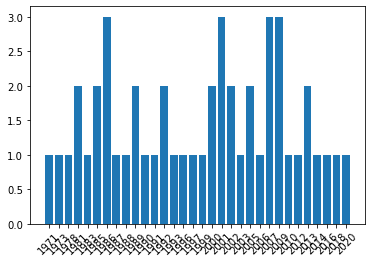

In [36]:
# Visualising the attempts per year in a friendlier way through a bar plot 
plt.bar(range(len(attempts_dict)), list(attempts_dict.values()), align='center')
plt.xticks(range(len(attempts_dict)), list(attempts_dict.keys()), rotation=45)
plt.show()

# Attempts by Country

In which countries do the most attempted prison break occur?

In [42]:
# extract countries from data
list_of_countries = []

for row in data:
    country = row[2]
    list_of_countries.append(country)

In [50]:
# count prison break attempts per country
countries_dict = {}

for country in list_of_countries:
    if country not in countries_dict:
        countries_dict[country] = 1
    else:
        countries_dict[country] += 1
        
countries_dict

{'Mexico': 1,
 'Ireland': 1,
 'United States': 8,
 'France': 15,
 'Canada': 4,
 'Australia': 2,
 'Brazil': 2,
 'Italy': 1,
 'United Kingdom': 2,
 'Puerto Rico': 1,
 'Chile': 1,
 'Netherlands': 1,
 'Greece': 4,
 'Belgium': 4,
 'Russia': 1}

The country with the highest number of prison break attempts is the France.